In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image

# Define the dataset structure
base_input_folder = 'NLM Filters'
base_output_folder = 'NLM Augmentation'
dataset_types = ['train', 'test']
classes = [
    'carcinoma_in_situ',
    'light_dysplastic',
    'moderate_dysplastic',
    'normal_columnar',
    'normal_intermediate',
    'normal_superficiel',
    'severe_dysplastic'
]

# Create an ImageDataGenerator and specify the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values
)

# Loop through each dataset type and class
for dataset_type in dataset_types:
    for class_name in classes:
        input_folder = os.path.join(base_input_folder, dataset_type, class_name + '_filtered_nlm')
        output_folder = os.path.join(base_output_folder, dataset_type, class_name + '_filtered_nlm_aug')

        # Ensure the output directory exists
        os.makedirs(output_folder, exist_ok=True)

        # Generate augmented images and save them to the output folder
        for filename in os.listdir(input_folder):
            image_path = os.path.join(input_folder, filename)

            # Load the image using Keras' load_img function
            image = load_img(image_path)

            # Resize the image to your desired size (e.g., 224x224)
            target_size = (224, 224)
            image = image.resize(target_size)

            # Convert the image to a NumPy array
            image_array = img_to_array(image)

            # Reshape the image array to match the expected input shape of the generator
            image_array = image_array.reshape((1,) + image_array.shape)

            # Generate augmented images using the datagen.flow() method
            augmented_images = datagen.flow(
                image_array,
                batch_size=16,
                save_to_dir=output_folder,
                save_prefix='augmented',
                save_format='png'
            )

            # Generate and save the augmented images
            num_augmented_images = 5
            for i, augmented_image in enumerate(augmented_images):
                if i >= num_augmented_images:
                    break

                augmented_image_pil = Image.fromarray((augmented_image[0] * 255).astype('uint8'))  # Ensure correct range

                save_filename = f'{filename.split(".")[0]}_{i}.png'
                save_path = os.path.join(output_folder, save_filename)
                augmented_image_pil.save(save_path)

print("Augmented images done for all classes and datasets.")

Augmented images done for all classes and datasets.


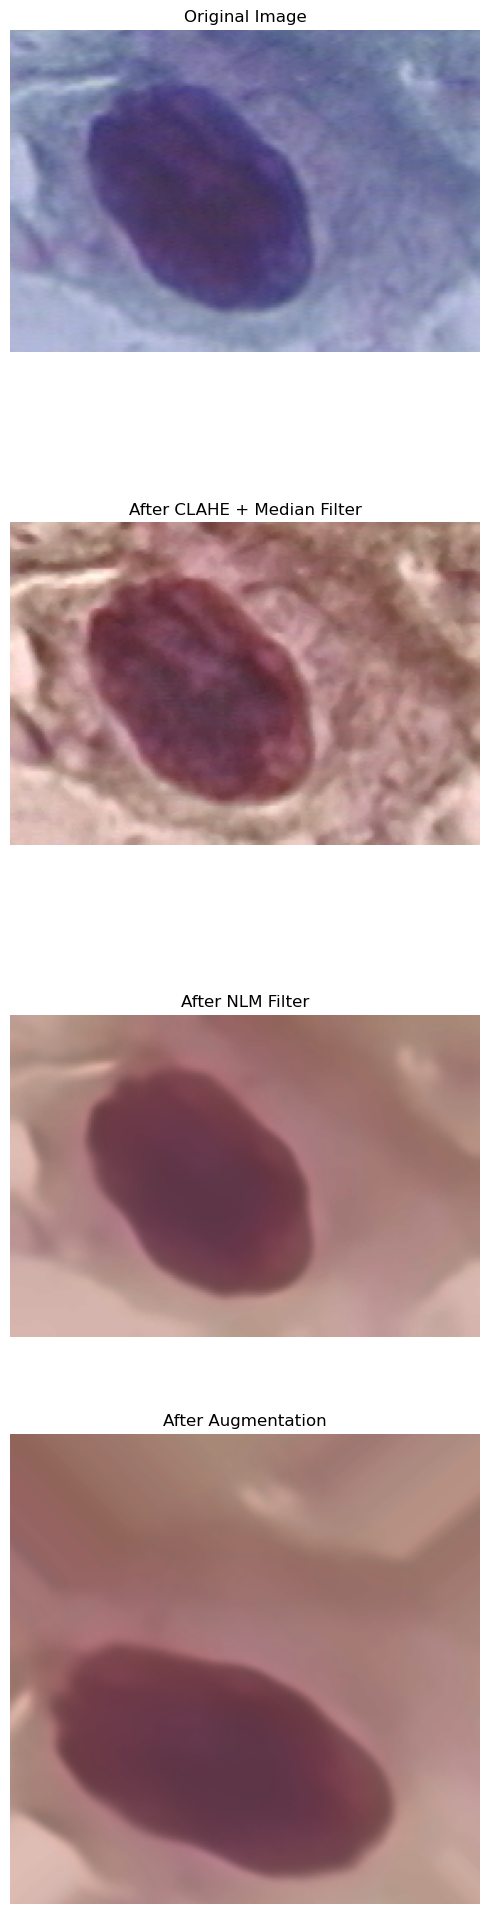

In [11]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img  # Ensure correct import

# Set up paths for a sample severe dysplastic image
base_path = "Herlev Dataset"  # Change this if needed
original_img_path = os.path.join(base_path, "Train", "severe_dysplastic", "149056321-149056343-001.BMP")
clahe_img_path = "C:/Users/priya/Desktop/PROJECTS/CERVICAL CANCER DEEP LEARNING/Multi-Modal-Cervical-Cancer-Diagnosis-with-Deep-Learning-and-Grad-Cam/Median and clahe Filters/train/severe_dysplastic_MC_filter/149056321-149056343-001_filtered.png"
nlm_img_path = "C:/Users/priya/Desktop/PROJECTS/CERVICAL CANCER DEEP LEARNING/Multi-Modal-Cervical-Cancer-Diagnosis-with-Deep-Learning-and-Grad-Cam/NLM Filters/train/severe_dysplastic_filtered_nlm/149056321-149056343-001_filtered.png"
aug_img_path = "C:/Users/priya/Desktop/PROJECTS/CERVICAL CANCER DEEP LEARNING/Multi-Modal-Cervical-Cancer-Diagnosis-with-Deep-Learning-and-Grad-Cam/NLM Augmentation/train/severe_dysplastic_filtered_nlm_aug/149056321-149056343-001_filtered_0.png"

# Check if files exist before loading
for path in [original_img_path, clahe_img_path, nlm_img_path, aug_img_path]:
    if not os.path.exists(path):
        print(f"❌ File Not Found: {path}")

# Create figure with 4 vertical subplots
plt.figure(figsize=(5, 20))  # Tall figure to accommodate vertical layout

# Original Image
plt.subplot(4, 1, 1)
original = load_img(original_img_path)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

# CLAHE + Median Filter
plt.subplot(4, 1, 2)
clahe = load_img(clahe_img_path)
plt.imshow(clahe)
plt.title('After CLAHE + Median Filter')
plt.axis('off')

# NLM Filter
plt.subplot(4, 1, 3)
nlm = load_img(nlm_img_path)
plt.imshow(nlm)
plt.title('After NLM Filter')
plt.axis('off')

# Augmented Image
plt.subplot(4, 1, 4)
aug = load_img(aug_img_path)
plt.imshow(aug)
plt.title('After Augmentation')
plt.axis('off')

plt.tight_layout()
plt.show()


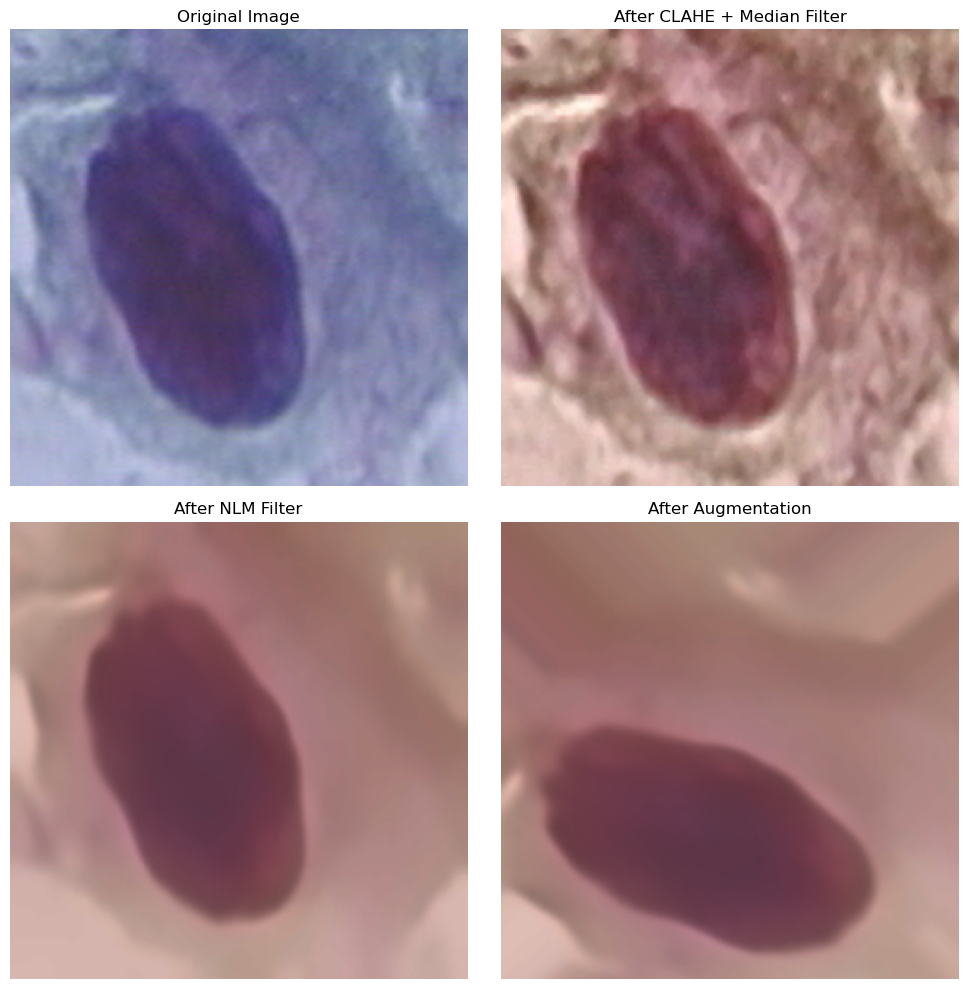

In [13]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img  # Ensure correct import

# Set up paths for a sample severe dysplastic image
base_path = "Herlev Dataset"  # Change this if needed
original_img_path = os.path.join(base_path, "Train", "severe_dysplastic", "149056321-149056343-001.BMP")
clahe_img_path = "C:/Users/priya/Desktop/PROJECTS/CERVICAL CANCER DEEP LEARNING/Multi-Modal-Cervical-Cancer-Diagnosis-with-Deep-Learning-and-Grad-Cam/Median and clahe Filters/train/severe_dysplastic_MC_filter/149056321-149056343-001_filtered.png"
nlm_img_path = "C:/Users/priya/Desktop/PROJECTS/CERVICAL CANCER DEEP LEARNING/Multi-Modal-Cervical-Cancer-Diagnosis-with-Deep-Learning-and-Grad-Cam/NLM Filters/train/severe_dysplastic_filtered_nlm/149056321-149056343-001_filtered.png"
aug_img_path = "C:/Users/priya/Desktop/PROJECTS/CERVICAL CANCER DEEP LEARNING/Multi-Modal-Cervical-Cancer-Diagnosis-with-Deep-Learning-and-Grad-Cam/NLM Augmentation/train/severe_dysplastic_filtered_nlm_aug/149056321-149056343-001_filtered_0.png"


from PIL import Image
import matplotlib.pyplot as plt

def load_and_resize(img_path, size=(256, 256)):
    img = Image.open(img_path)
    return img.resize(size)

# Define a fixed size (adjust if needed)
fixed_size = (256, 256)

# Load and resize images
original = load_and_resize(original_img_path, fixed_size)
clahe = load_and_resize(clahe_img_path, fixed_size)
nlm = load_and_resize(nlm_img_path, fixed_size)
aug = load_and_resize(aug_img_path, fixed_size)

# Create 2x2 grid
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(clahe)
plt.title('After CLAHE + Median Filter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(nlm)
plt.title('After NLM Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(aug)
plt.title('After Augmentation')
plt.axis('off')

plt.tight_layout()
plt.show()